In [132]:
from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sb
import numpy as np
from patsy import dmatrix
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_logit, scalling

In [137]:
df=read_excel("복지패널조사수정파일 최종본.xlsx")
df

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,세금환급금,금융기관대출,주거관련_부채의_이자,주택관련_부채액,공적연금_연간소득
0,275,0.0,0,7.0,0.0,10000,0,0.0,0
1,239,0.0,0,7.0,0.0,0,0,0.0,0
2,156,0.0,80,7.0,0.0,14000,720,20500.0,540
3,541,140.0,0,9.0,0.0,0,0,0.0,0
4,85,50.0,0,7.0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...
7860,384,0.0,0,1.0,70.0,3000,96,3000.0,0
7861,715,0.0,660,1.0,90.0,40000,0,0.0,0
7862,595,0.0,4000,1.0,0.0,25947,67,25947.0,0
7863,562,40.0,0,0.0,0.0,12000,360,12000.0,0


In [138]:
df1=df.copy()

In [ ]:
# df1=df.rename(columns={'h1707_9':'총생활비','h1708_aq9':'이자_배당금_연간소득','h1708_aq10':'임대료_연간소득',
#                        'h1708_aq30':'기타_소득','h1708_6aq3':'세금환급금','h1709_aq1':'금융기관대출',
#                        'h1709_aq6':'기타부채','h1709_aq7':'주거관련_부채의_이자','h1706_aq3':'주택관련_부채액'})
# df1

In [ ]:
#독립변수 제외 후보 컬럼 삭제하기

# df2=df1.drop(columns=['증여,상속','동산,부동산_매매차익','일반사채','카드빚','기타부채'])
# df2

for문으로 컬럼 돌려서 수치가 0인값, 0이 아닌값 찾아보기

In [140]:
for column in df1.columns:
    zero_count = df1.loc[df1[column] == 0].shape[0]
    number_count = df1.loc[df1[column] != 0].shape[0]
    print('0 개수 :',{column : zero_count})
    # print('0 아닌 수 :',{column : number_count})
    # print('-'*30)

0 개수 : {'총생활비': 0}
0 개수 : {'이자_배당금_연간소득': 5489}
0 개수 : {'임대료_연간소득': 6707}
0 개수 : {'기타_소득': 1439}
0 개수 : {'세금환급금': 6275}
0 개수 : {'금융기관대출': 5500}
0 개수 : {'주거관련_부채의_이자': 6414}
0 개수 : {'주택관련_부채액': 5342}
0 개수 : {'공적연금_연간소득': 4777}


# `이상치/결측치` 확인 및 처리

- 종속변수
>총생활비

- 독립변수
> '이자_배당금_연간소득','임대료_연간소득','기타_소득','세금환급금','금융기관대출'</br>
> '주거관련_부채의_이자','주택관련_부채액','공적연금_연간소득'

- 불로소득에 포함되는 변수
>이자_배당금_연간소득, 임대료_연간소득, 공적연금_연간소득

사용할 분석방법 후보

1. 피어슨 상관분석

2. 회귀분석(단순회귀,다중회귀)

3. 

In [99]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [142]:
df1.head()

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,세금환급금,금융기관대출,주거관련_부채의_이자,주택관련_부채액,공적연금_연간소득
0,275,0.0,0,7.0,0.0,10000,0,0.0,0
1,239,0.0,0,7.0,0.0,0,0,0.0,0
2,156,0.0,80,7.0,0.0,14000,720,20500.0,540
3,541,140.0,0,9.0,0.0,0,0,0.0,0
4,85,50.0,0,7.0,0.0,0,0,0.0,0


## #1. 종속/독립변수 상관관계 파악

동시에 이상치 확인

In [143]:
print(df1.columns)

Index(['총생활비', '이자_배당금_연간소득', '임대료_연간소득', '기타_소득', '세금환급금', '금융기관대출',
       '주거관련_부채의_이자', '주택관련_부채액', '공적연금_연간소득'],
      dtype='object')


### 이자_배당금_연간소득

귀무가설: 총생활비와 y값의 상관이 없다.<br>
대립가설: 총생활비는 y갑과 상관이 있다.

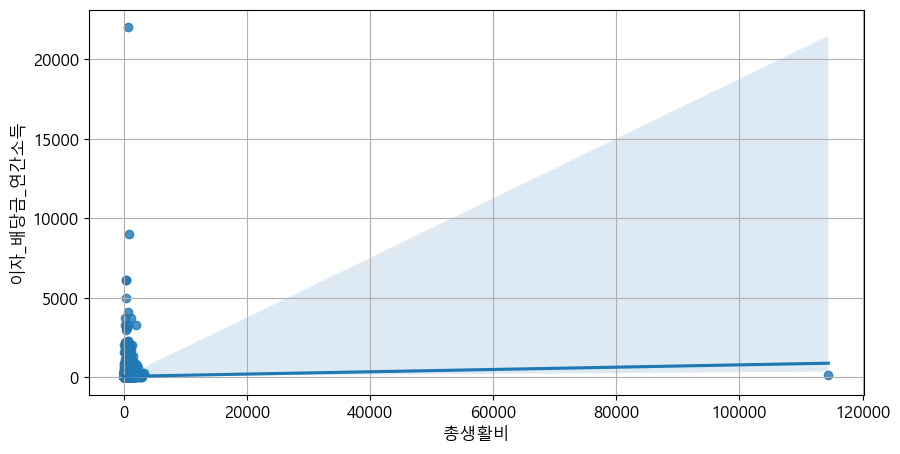

In [144]:
sb.regplot(data=df1, x='총생활비', y='이자_배당금_연간소득')
plt.grid()
plt.show()
plt.close()

총 생활비 이상치 있어서 query함수 통해 조회하기 및 이상치 행 삭제

In [145]:
df1_1=df1.query('총생활비 >5000')
df1_1

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,세금환급금,금융기관대출,주거관련_부채의_이자
1097,114446,134.0,0,8.0,0.0,0,0


이상치 행 제외하고 재조회

In [146]:
df2=df1.query('총생활비 <5000')
df2

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,세금환급금,금융기관대출,주거관련_부채의_이자,주택관련_부채액,공적연금_연간소득
0,275,0.0,0,7.0,0.0,10000,0,0.0,0
1,239,0.0,0,7.0,0.0,0,0,0.0,0
2,156,0.0,80,7.0,0.0,14000,720,20500.0,540
3,541,140.0,0,9.0,0.0,0,0,0.0,0
4,85,50.0,0,7.0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...
7860,384,0.0,0,1.0,70.0,3000,96,3000.0,0
7861,715,0.0,660,1.0,90.0,40000,0,0.0,0
7862,595,0.0,4000,1.0,0.0,25947,67,25947.0,0
7863,562,40.0,0,0.0,0.0,12000,360,12000.0,0


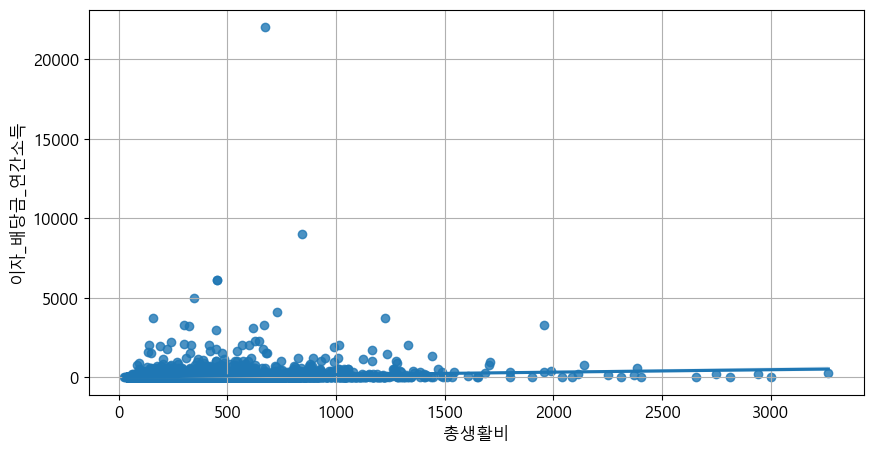

In [148]:
sb.regplot(data=df2, x='총생활비', y='이자_배당금_연간소득')
plt.grid()
plt.show()
plt.close()

In [149]:
r, p = stats.pearsonr(df2['총생활비'], df2['이자_배당금_연간소득'])

r, p

(0.12104687183478402, 4.654178499632398e-27)

총생활비와 이자배당금연간소득간의 상관계수는 낮으나 p-value값은 유의수준0.05보다 낮으므로 귀무가설을 기각하고 대립가설을 채택한다.


데이터에서는 총생활비와 이자배당금연간소득 간의 상관관계가 거의 존재하지 않아 두 변수의 선형적인 관계는 크지 않을 수 있습니다. 하지만, p-value가 매우 작으므로 이 관계가 우연히 발생한 것이 아니라고 판단할 수 있습니다. 따라서, 총생활비와 이자배당금연간소득 간의 상관관계를 통계적으로 유의미하다고 할 수 있습니다.

In [151]:
# 그래프 생성을 위해 컬럼 이름, 길이 확인
df2.head()
df2.columns
len(df2.columns)

9

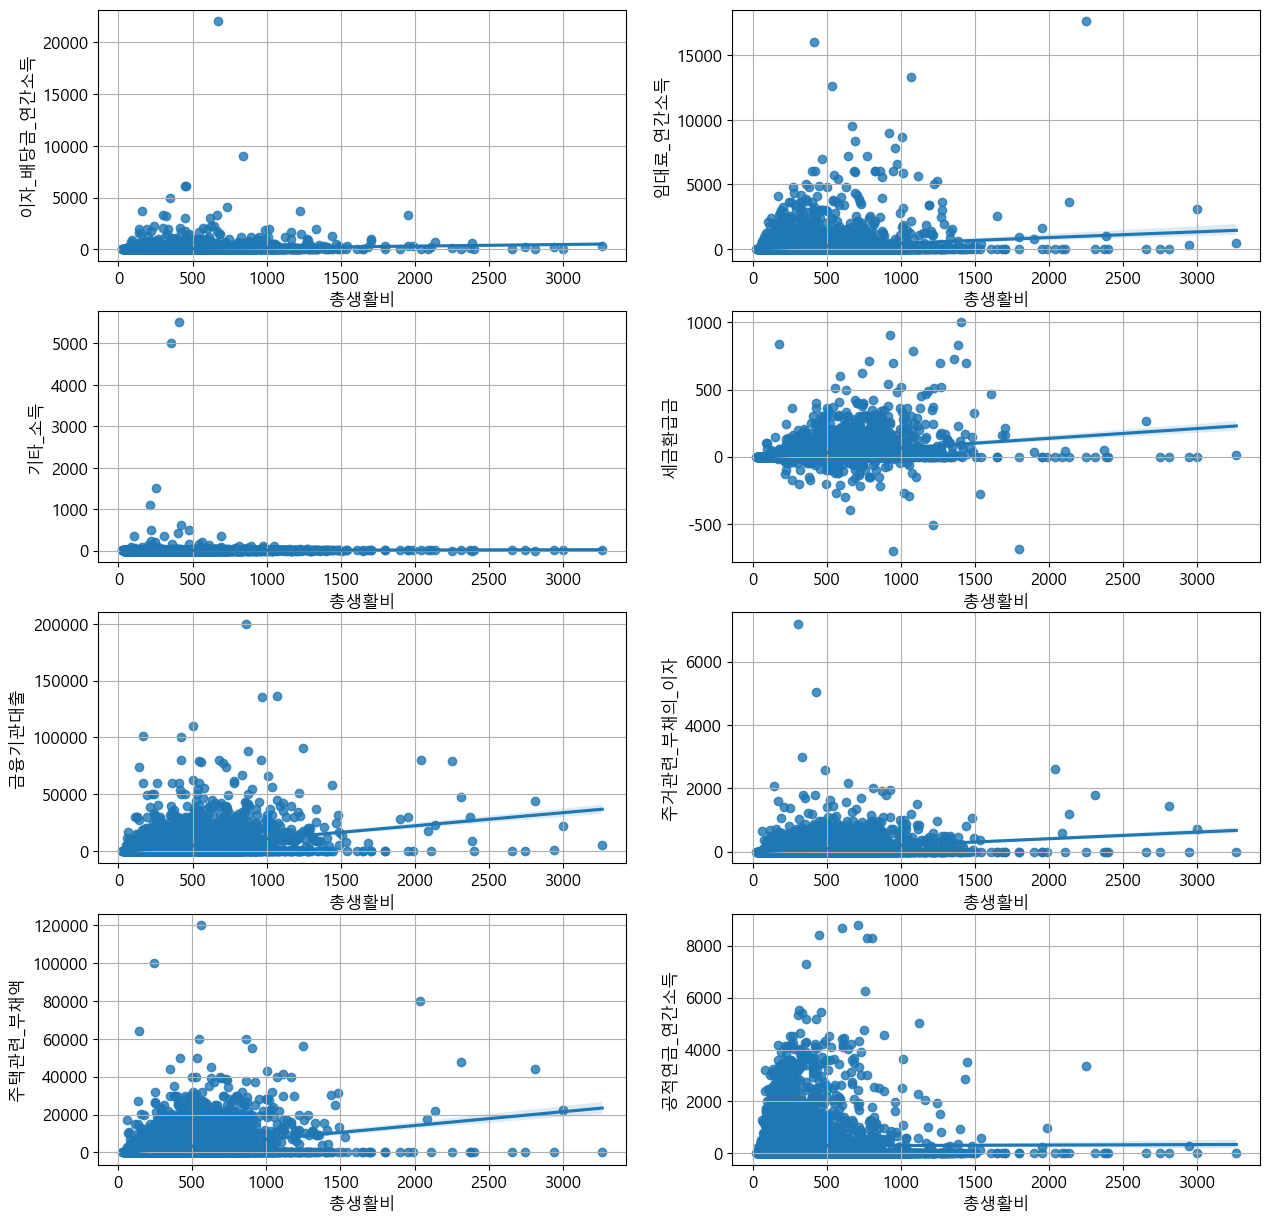

In [152]:
# index = 0부터 시작하면 '총생활비'-'총생활비' 그래프도 그리려고 시도함
columns = list(df2.columns)[1:]

# 4행 2열로 8개의 서브플롯 그래프 그리기
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# 종속변수 설정
dependent_variable = '총생활비'

for i, c in enumerate(columns):
    row, col = divmod(i, 2)
    sb.regplot(data=df2, x=dependent_variable, y=c, ax=ax[row, col])
    ax[row, col].set_xlabel(dependent_variable)
    ax[row, col].set_ylabel(c)
    ax[row, col].grid()

plt.show()
plt.close()